**To do**
1. polynomial features
2. k fold cross validation
3. run best model on entire training data
4. run best model on testing data
    + Give Scores and ScatterPlots
5. Fix Outline and Clean Code


**If Time**
1. Lasso Regularization
2. Regression with Lasso Drop

# Layout:
1. Import Packages/Libraries
2. Read Data From Previous Scrape
3. Clean + Feature Engineer Data
    + Drop Duplicates
    + Set Column Values From Object to Respective Values
    + Turn Categorical Data into 0/1 Variables
    + Drop Movies
4. Split into Train and Test Set
    + Remove Outliers from Training Data
5. EDA on Training Set
    + Pairplot
    + Correlations
6. Base Model- Patsy
7. Diagnostic Plots on Base Model
8. Scale/Normalize Values
    + Log Dependent Variable- Success
    + Boxcox- Fail 
9. EDA Scaled Values
10. Regression
    + Drop Variables with High Multicolinearity
    + Regress
11. Diagnostic Plots on Updated Regression
12. Add Polynomial Features


13. Lasso Regularization
14. Regression with Lasso Drop


15. Run and Compare Models + Advanced Models
16. Run Best Model on Test Data
17. Give Scores and ScatterPlots

# Mass Importation

In [1]:
import pandas as pd
import numpy as np
import dateutil.parser
from datetime import date
import re

from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from scipy import stats
from sklearn import linear_model,ensemble, tree, model_selection, datasets

import diagnostic_plots

import pickle
import time

/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Read Dataset from Scrape

In [2]:
df=pd.read_csv('steam3.csv')
del(df['Unnamed: 0'])
df.set_index('title', inplace=True)
df.head()

,link,system,systems,reviews,release_date,discount,price
title,,,,,,,
Warframe,https://store.steampowered.com/app/230410/Warf...,1,['win'],192592,1940,0,0.00
Clicker Heroes 2,https://store.steampowered.com/app/629910/Clic...,2,"['win', 'mac']",183,1,0,29.99
Tom Clancy's Rainbow Six® Siege,https://store.steampowered.com/app/359550/Tom_...,1,['win'],170518,959,0,14.99
Counter-Strike: Global Offensive,https://store.steampowered.com/app/730/Counter...,3,"['win', 'mac', 'linux']",2628652,2156,0,14.99
Grand Theft Auto V,https://store.steampowered.com/app/271590/Gran...,1,['win'],343780,1191,34,29.99


# Clean Data and Add Dummy Features

## Remove Duplicates

In [3]:
no_dup_df = df[~df.index.duplicated(keep='first')]

## Set Column Value Types

In [4]:
no_dup_df['system'] = no_dup_df.system.astype(int)
no_dup_df['reviews'] = no_dup_df.reviews.astype(int)
no_dup_df['release_date'] = no_dup_df.release_date.astype(int)
no_dup_df['discount'] = no_dup_df.discount.astype(int)
no_dup_df['price'] = no_dup_df.price.astype(float)
no_dup_df['systems'] = no_dup_df.systems.astype(list)

/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

## Windows, Mac, Linux -> Dummy Variables

In [5]:
windows=[1 if 'win' in item else 0 for item in no_dup_df.systems]
mac=[1 if 'mac' in item else 0 for item in no_dup_df.systems]
linux=[1 if 'linux' in item else 0 for item in no_dup_df.systems]

In [6]:
no_dup_df['windows']=windows
no_dup_df['mac']=mac
no_dup_df['linux']=linux

/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [7]:
no_dup_df['windows'] = no_dup_df.windows.astype(int)
no_dup_df['mac'] = no_dup_df.mac.astype(int)
no_dup_df['linux'] = no_dup_df.linux.astype(int)
#no_dup_df.info()

/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

## Drop Movies

In [8]:
movies=[]
for i in range(len(no_dup_df['systems'])):
    element=(no_dup_df['systems'][i])
    if 'win' not in element and 'mac' not in element and 'linux' not in element:
        movies.append(1)
    else:
        movies.append(0)
no_dup_df['movies']=movies
no_dup_df = no_dup_df[no_dup_df.movies != 1]
del(no_dup_df['movies'])

/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Split Data into Train/Test

In [9]:
y = no_dup_df['reviews']
X = no_dup_df.drop(['reviews','link','systems'], axis = 1)

In [10]:
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3)
tdf=X_t.join(y_t)

## Remove Outliers from Training Set

In [11]:
traindf=tdf[tdf.reviews < 100000]
y_train = traindf['reviews']
X_train = traindf.drop(['reviews'], axis = 1)

# Exploratory Data Analysis on Train Data

## Pairplot

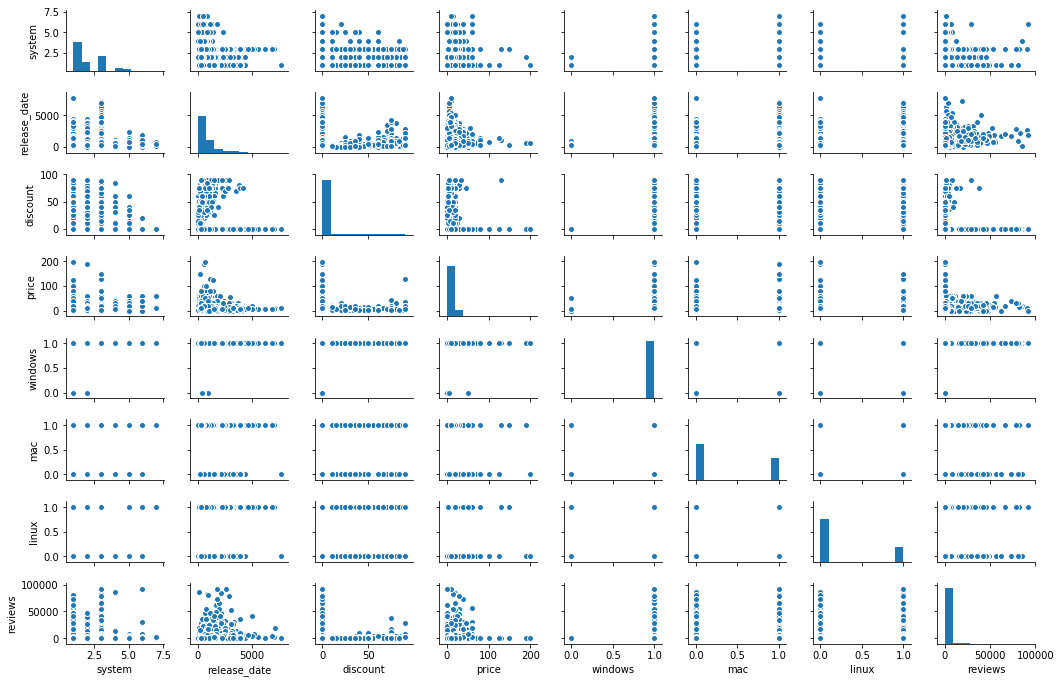

In [12]:
sns.pairplot(traindf, size = 1.2, aspect=1.5)

## Correlation Matrix

In [13]:
traindf.corr()
#sns.heatmap(no_dup_df.corr(), cmap="seismic")

,system,release_date,discount,price,windows,mac,linux,reviews
system,1.000000,-0.075067,-0.026014,0.048444,0.013063,0.505254,0.534975,0.037629
release_date,-0.075067,1.000000,-0.014801,0.057739,0.005512,0.081736,0.055092,0.190764
discount,-0.026014,-0.014801,1.000000,-0.030463,0.005389,0.013119,0.012422,-0.005143
price,0.048444,0.057739,-0.030463,1.000000,-0.019639,0.009867,0.012593,0.178521
windows,0.013063,0.005512,0.005389,-0.019639,1.000000,-0.014095,-0.021529,0.005439
mac,0.505254,0.081736,0.013119,0.009867,-0.014095,1.000000,0.655931,0.083364
linux,0.534975,0.055092,0.012422,0.012593,-0.021529,0.655931,1.000000,0.097453
reviews,0.037629,0.190764,-0.005143,0.178521,0.005439,0.083364,0.097453,1.000000


# Base Model

In [14]:
model = sm.OLS(y_train, sm.add_constant(X_train))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                reviews   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     60.30
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           8.89e-84
Time:                        19:57:14   Log-Likelihood:                -54172.
No. Observations:                5430   AIC:                         1.084e+05
Df Residuals:                    5422   BIC:                         1.084e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2930.4362   3012.741     -0.973      0.331   -8836.618    2975.746
system         -46.9283     77.941     -0.602      0.547    -199.723     105.866
release_date     1.0704      0.082     13.108      0.000       0.910       1.230
discount         0.4023      5.255      0.077      0.939      -9.900      10.705
price           85.2531      6.666     12.789      0.000      72.185      98.322
windows       2268.1355   3011.778      0.753      0.451   -3636.158    8172.429
mac            249.1447    200.227      1.244      0.213    -143.380     641.669
linux          938.7588    224.247      4.186      0.000     499.144    1378.373
==============================================================================
Omnibus:                     8035.751   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2890889.096
Skew:                           9.081   Prob(JB):                         0.00
Kurtosis:                     114.569   Cond. No.                     7.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Diagnostic Plots on Base Model

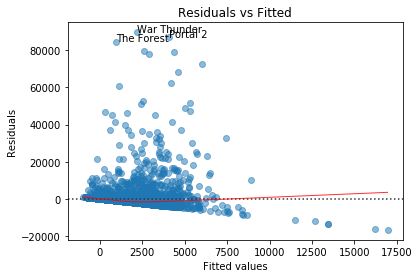

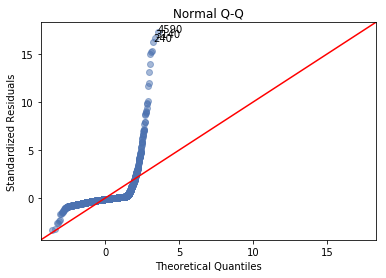

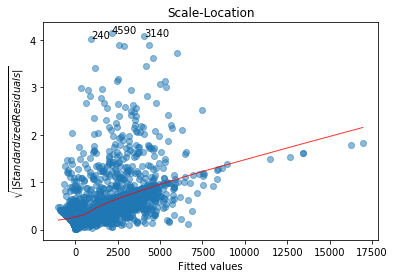

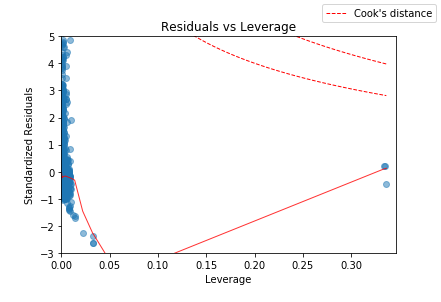

In [15]:
y_traindf=pd.DataFrame(y_train)
X_traindf=pd.DataFrame(X_train)
diagnostic_plots.diagnostic_plots(X_traindf, y_traindf, fit)

# Rescale/Normalize Data

## Log Data

/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(array([1383.,    0., 1035.,  851.,  732.,  566.,  433.,  252.,  136.,
          42.]),
 array([ 0.        ,  1.14273894,  2.28547787,  3.42821681,  4.57095575,
         5.71369468,  6.85643362,  7.99917255,  9.14191149, 10.28465043,
        11.42738936]),
 <a list of 10 Patch objects>)

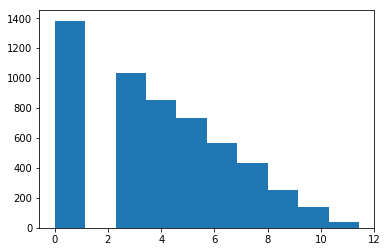

In [16]:
traindf['log_reviews'] = np.log(traindf.reviews + 1)
plt.hist(traindf['log_reviews'])

## Boxcox- Attempt, realize it makes no difference, stick to log

In [17]:
yt, _ = stats.boxcox(traindf['reviews']+1)

(array([1383.,    0.,  700.,  878.,  742.,  667.,  511.,  313.,  179.,
          57.]),
 array([0.        , 0.98254956, 1.96509911, 2.94764867, 3.93019822,
        4.91274778, 5.89529734, 6.87784689, 7.86039645, 8.84294601,
        9.82549556]),
 <a list of 10 Patch objects>)

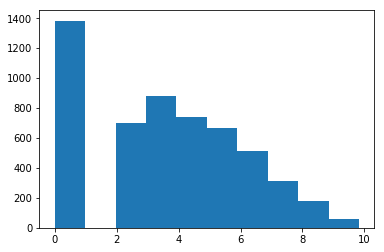

In [18]:
plt.hist(yt)

# EDA on Scaled Data, Log Reviews as Dependent

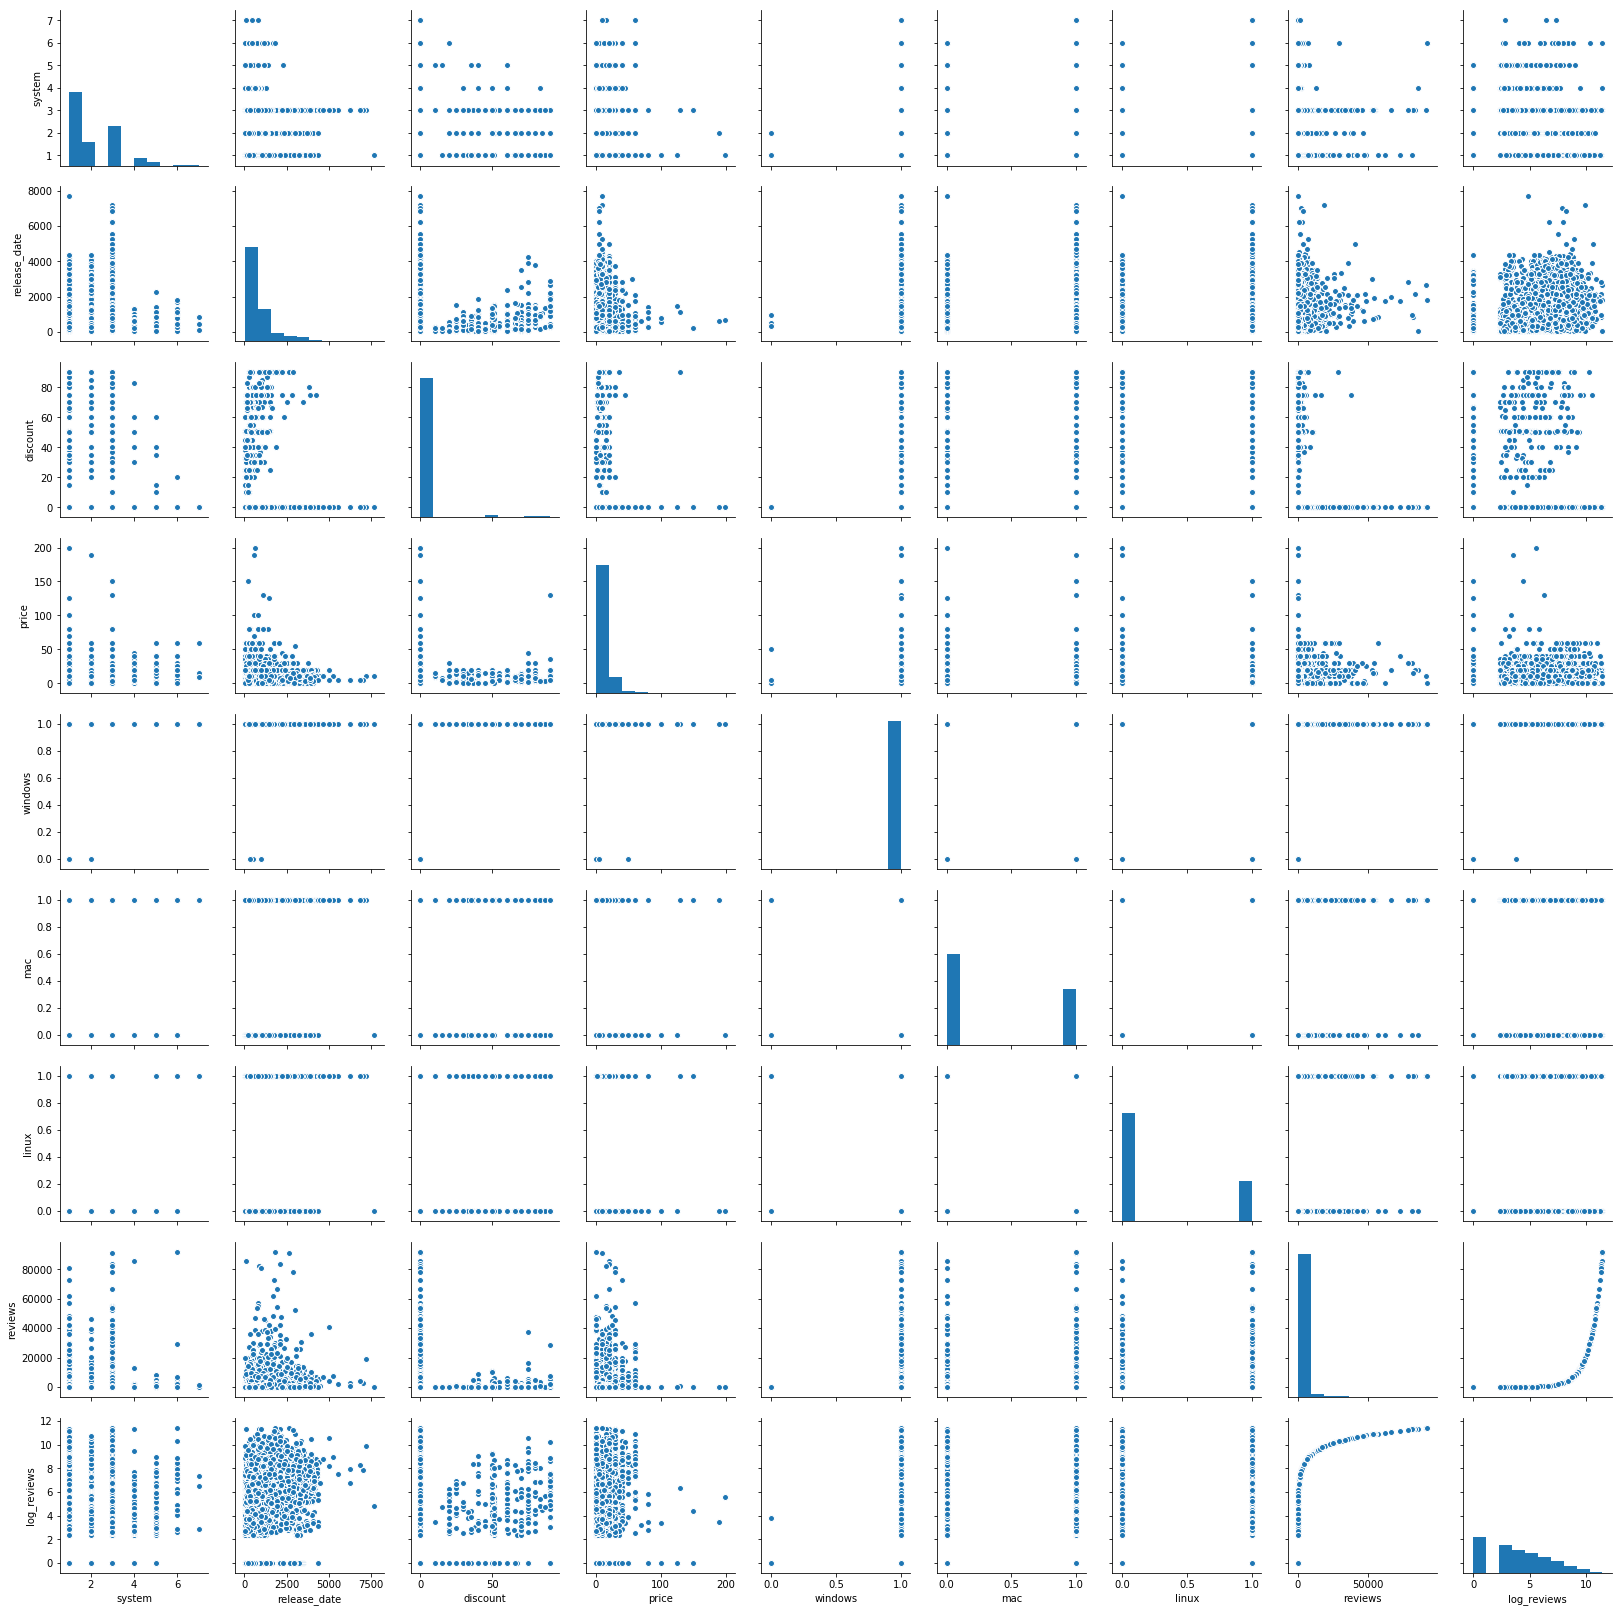

In [36]:
sns.pairplot(traindf[traindf.release_date > 30])

In [20]:
traindf.corr()

,system,release_date,discount,price,windows,mac,linux,reviews,log_reviews
system,1.000000,-0.075067,-0.026014,0.048444,0.013063,0.505254,0.534975,0.037629,0.082418
release_date,-0.075067,1.000000,-0.014801,0.057739,0.005512,0.081736,0.055092,0.190764,0.416561
discount,-0.026014,-0.014801,1.000000,-0.030463,0.005389,0.013119,0.012422,-0.005143,0.036066
price,0.048444,0.057739,-0.030463,1.000000,-0.019639,0.009867,0.012593,0.178521,0.275555
windows,0.013063,0.005512,0.005389,-0.019639,1.000000,-0.014095,-0.021529,0.005439,0.021103
mac,0.505254,0.081736,0.013119,0.009867,-0.014095,1.000000,0.655931,0.083364,0.213130
linux,0.534975,0.055092,0.012422,0.012593,-0.021529,0.655931,1.000000,0.097453,0.195341
reviews,0.037629,0.190764,-0.005143,0.178521,0.005439,0.083364,0.097453,1.000000,0.452984
log_reviews,0.082418,0.416561,0.036066,0.275555,0.021103,0.213130,0.195341,0.452984,1.000000


# Regression on Log Values

## Drop high multicolinear elements
+ Those with no reviews
+ That don't run on windows

In [64]:
mask = (traindf.reviews > 0) | (traindf.windows == 1)

## Run Regression

In [69]:
traindf2 = traindf[mask]
y2 = traindf2['log_reviews']
X2 = traindf2.drop(['log_reviews','reviews', 'system', 'windows'], axis = 1)

model2 = sm.OLS(y2, sm.add_constant(X2))
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_reviews   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     414.8
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:35:06   Log-Likelihood:                -12496.
No. Observations:                5428   AIC:                         2.500e+04
Df Residuals:                    5422   BIC:                         2.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7197      0.058     29.622      0.000       1.606       1.834
release_date     0.0013   3.75e-05     33.406      0.000       0.001       0.001
discount         0.0099      0.002      4.040      0.000       0.005       0.015
price            0.0677      0.003     21.885      0.000       0.062       0.074
mac              0.6897      0.090      7.657      0.000       0.513       0.866
linux            0.6025      0.099      6.092      0.000       0.409       0.796
==============================================================================
Omnibus:                        8.604   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.473
Skew:                          -0.048   Prob(JB):                      0.00877
Kurtosis:                       3.180   Cond. No.                     4.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Diagnostic Plot on Logged/Dropped Values

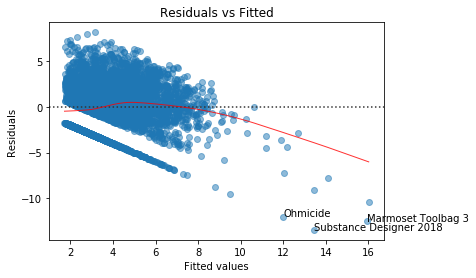

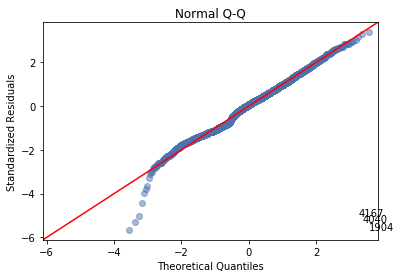

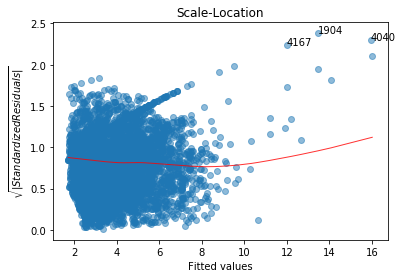

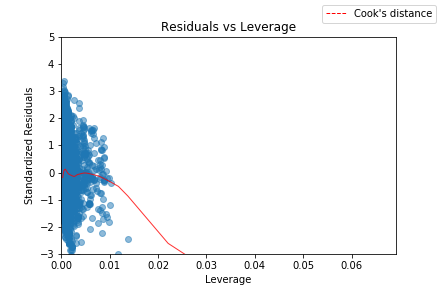

In [70]:
y_traindf2=pd.DataFrame(y2)
X_traindf2=pd.DataFrame(X2)
diagnostic_plots.diagnostic_plots(X_traindf2, y_traindf2, fit2)

In [52]:
# for index in np.argsort(fit2.get_influence().hat_matrix_diag)[-5:]:
#     print(index, fit2.get_influence().hat_matrix_diag[index])
# X_traindf2.iloc[[3676, 1793, 4824], : ]

,system,release_date,discount,price,windows,mac,linux
title,,,,,,,
Arma: Cold War Assault Mac/Linux,2,490,0,4.99,0,1,1
Alienware Steam Machine,1,980,0,0.00,0,0,1
Punch! Landscape Design for Mac v19,1,362,0,49.99,0,1,0


# Regularize

In [ ]:
alphas = [10**x for x in range(-12, 5)]
scores = np.zeros((len(alphas),1))

In [ ]:
for j in range(len(alphas)):
    kf_score = []
    for train, test in kf:
        X_train = X.iloc[train]
        y_train = y.iloc[train]
        X_test = X.iloc[test]
        y_test = y.iloc[test]
        std_scaler = preprocessing.StandardScaler()
        X_train_norm = std_scaler.fit_transform(X_train)
        X_test_norm = std_scaler.transform(X_test)
    
        model =  Lasso(alpha = alphas[j])
        model.fit(X_train_norm, y_train)
        y_test_predict = model.predict(X_test_norm)
        score = mean_squared_error(y_test_predict, y_test)
        kf_score.append(score)
    scores[j] = np.mean(kf_score)
print ('mse for all alpha values \n')
print (pd.DataFrame(list(zip(alphas, scores)), columns=['alpha', 'mse']))

In [ ]:
best_alpha = alphas[scores.argmin()]
print ('alpha:', best_alpha)

In [ ]:
std_scaler = preprocessing.StandardScaler()
X_norm = std_scaler.fit_transform(X)

final_model =  Lasso(alpha = best_alpha)
final_model.fit(X_norm, y)
y_predict = final_model.predict(X_norm)
final_model_score = mean_squared_error(y_predict, y)
print ('MSE:', final_model_score)

In [ ]:
df_coef = pd.DataFrame(list(zip(X.columns, final_model.coef_)), columns = ['variable', 'coefficient'])
print ('Keep')
print (df_coef[df_coef['coefficient']!=0])

In [ ]:
print ('Drop')
print (df_coef[df_coef['coefficient']==0])

# Compare with More Complicated Models

In [71]:
def get_scores(X, y, folds = 10, alpha = 0.5): 

    models = {}
    parameters = {}
    
    models['linear_model'] = linear_model.LinearRegression()
    models['ridge_model'] = linear_model.Ridge()
    models['lasso_model'] = linear_model.Lasso(alpha=alpha)
    models['robust_regression'] = linear_model.SGDRegressor(loss='huber',max_iter=2000)
    models['eps_insensitive'] = linear_model.SGDRegressor(loss='epsilon_insensitive',max_iter=2000)
    models['cart'] = tree.DecisionTreeRegressor(max_depth=7)
    models['extratrees'] = tree.ExtraTreeRegressor(max_depth=7)
    models['randomForest'] = ensemble.RandomForestRegressor()
    models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
    models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()
    
    score_list = []
    for name,model in models.items():
        scores = model_selection.cross_val_score(model, X, y, 
                                                 cv = folds, n_jobs=1, scoring="r2")  
        score_list.append(np.mean(scores))

    scores_df = pd.DataFrame({'Model': list(models.keys()),
                             'Scores': score_list})

    return scores_df

## Compare with Unlogged Data

In [72]:
get_scores(X_train,y_train, folds = 10, alpha = 0.5)

,Model,Scores
0,linear_model,0.069328
1,ridge_model,0.069349
2,lasso_model,0.069313
3,robust_regression,-0.033683
4,eps_insensitive,-0.000479
5,cart,-0.076661
6,extratrees,-0.005552
7,randomForest,-0.173778
8,adaboostedTrees,-1.081659
9,gradboostedTrees,0.085293


## Compare with Logged/Modified Data

In [73]:
get_scores(X2, y2, folds = 10, alpha = 0.5)

,Model,Scores
0,linear_model,0.274210
1,ridge_model,0.274211
2,lasso_model,0.237577
3,robust_regression,-12.106560
4,eps_insensitive,-5333.170587
5,cart,0.393448
6,extratrees,0.291949
7,randomForest,0.236189
8,adaboostedTrees,0.332294
9,gradboostedTrees,0.430287


In [95]:
gb = ensemble.GradientBoostingRegressor(alpha=0.9, n_estimators=200, min_samples_split=2, max_depth=3)
cross_val_score(gb, X2, y2, cv = 10, n_jobs=1, scoring="r2").mean()

0.43134432919748145

# Run RandomForest on Test

# Compare to Actual Values- Scores and Plotting